# 4. Dual Interpretation [10 pts]

#### by Roumen Guha, on Sunday, February 19th, 2017

Suppose t ∈ [0; 2π] is a parameter. Consider the following LP:

$$\begin{aligned}
\text{minimize}\qquad& p + q + r + s\\
\text{subject to:}\qquad& p - r = cos(t) \\
& q - s = sin(t) \\
& p, q, r, s \ge 0 \\
\end{aligned}$$

__a)__ Plot the optimal objective of this LP as a function of t. Can you explain what you see? Hint: separately consider the cases where cos(t) and sin(t) are positive or negative (four cases).

In [5]:
using JuMP, Gurobi, Mosek

function solveLP(t)

    m = Model()

    @variable(m, p >= 0)
    @variable(m, q >= 0)
    @variable(m, r >= 0)
    @variable(m, s >= 0)

    @constraint(m, p - r == cos(t))
    @constraint(m, q - s == sin(t))

    @objective(m, Min, p + q + r + s)

    solve(m)
    
    return(getobjectivevalue(m))
    
end

solveLP (generic function with 1 method)

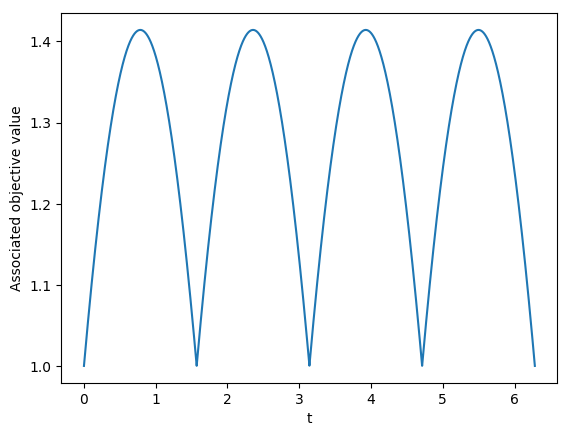

PyObject <matplotlib.text.Text object at 0x0000000031196860>

In [35]:
using PyPlot

t_array = linspace(0, 2*pi, 10000)
obj_array = zeros(10000)

for i in 1:10000
    obj_array[i] = solveLP(t[i])
end

plot(t_array, obj_array)
xlabel("t")
ylabel("Associated objective value")

There's not much to see, just that it is periodic with frequency pi/2 and never descends past 1, and also never increases past sqrt(2).

When both cos(t) and sin(t) are positive, that means that p >= r and q >= s. 

When both cos(t) and sin(t) are negative, this means that p <= r and q <= s.

When cos(t) is positive and sin(t) is negative, we know that p >= r and q <= s.

When cos(t) is negative and sin(t) is positive, we know that p <= r and q >= s.

__b)__ Find the dual LP and interpret it geometrically. Does this agree with the solution of part a)?

In [46]:
using JuMP, Gurobi, Mosek

m2 = Model()

@variable(m2, λ[1:2])

@constraint(m2, λ[1] <= -1)
@constraint(m2, λ[2] <= 1)

@objective(m2, Max, cos(t)*λ[1]+ sin(t)*λ[2]);

<img src="Q4b.jpg">

Note: I forgot to write this on the page, but since λ1 has two constraints, the lower of the two upper-bounds is the correct one. There is a mistake on the page, the last element of the A vector should be -1. Therefore the constraints are:

λ1 <= -1

λ2 <= -1

As for the geometric interpretation, we can see from this picture that the constraints that were present on p, q, r and s in the primal form of the problem have shifted into constraints on the lambdas which are naturally free variables. In fact, these constraints plot out the same vertices that the original problem did, meaning that we achieve the same planes of solutions. Yes, this dual formation agrees with the original primal formation. 